# Flight NYC EDA (departure and arrival) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
flight_data=pd.read_csv('flight_data.csv')

In [9]:
flight_data.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [10]:
flight_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
flight,336776.0,1971.923620,1632.471938,1.0,553.0,1496.0,3465.0,8500.0


In [7]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


# Drop Columns which are not needed


In [12]:
#Drop redundant columns
flight_data.drop(['year'],axis=1,inplace=True)
flight_data.drop(['minute'],axis=1,inplace=True)
#flight_data.drop(['time_hour'],axis=1,inplace=True)


# 1. Departure delays analysis

In [13]:
df2 = flight_data.loc[flight_data['dep_time'].notnull(),['dep_time','dep_delay','carrier','origin','flight','hour']]

In [14]:
#check current dataframe status , no NaN in dep_xxx
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328521 entries, 0 to 336769
Data columns (total 6 columns):
dep_time     328521 non-null float64
dep_delay    328521 non-null float64
carrier      328521 non-null object
origin       328521 non-null object
flight       328521 non-null int64
hour         328521 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 17.5+ MB


In [17]:
#downcast dep_time to intger 
df2['dep_time'] = df2['dep_time'].astype(int)
#downcast dep_delay to intger 
df2['dep_delay'] = pd.to_numeric(df2['dep_delay'],downcast='integer')
#change flight number to string 
df2['flight'] = df2['flight'].astype(str)

# Find Carrier wise average Departure Delay

In [19]:
#departure  delay carrier wise 
b=df2[['dep_delay','carrier']].groupby('carrier').mean()

Carriers:   Index(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA',
       'US', 'VX', 'WN', 'YV'],
      dtype='object', name='carrier')
Max Average Delay dep_delay    20.215543
dtype: float64
Carrier with Max Average Delay dep_delay    F9
dtype: object
Min Average Delay dep_delay    3.782418
dtype: float64
Carrier with Min Average Delay dep_delay    US
dtype: object


Text(0.5,0.98,'Carrier wise (Average) Departure Delay')

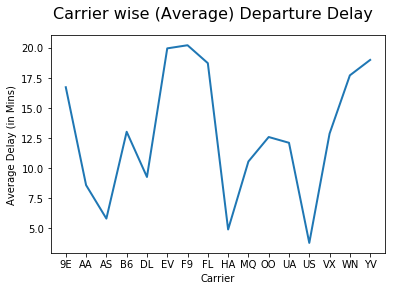

In [20]:
print("Carriers:  ", b.index)
print("Max Average Delay", b.max())
print("Carrier with Max Average Delay", b.idxmax())
print("Min Average Delay", b.min())
print("Carrier with Min Average Delay", b.idxmin())

plt.plot(b, linewidth=2.0)
plt.xlabel('Carrier')
plt.ylabel('Average Delay (in Mins)')
plt.suptitle('Carrier wise (Average) Departure Delay',fontsize=16)


In [22]:
b


,dep_delay
carrier,
9E,16.725769
AA,8.586016
AS,5.804775
B6,13.022522
DL,9.264505
EV,19.955390
F9,20.215543
FL,18.726075
HA,4.900585



# Find Airport wise average Departure Delay

Origin:   Index(['EWR', 'JFK', 'LGA'], dtype='object', name='origin')
Max Average Delay dep_delay    15.107954
dtype: float64
Airport with Max Average Delay dep_delay    EWR
dtype: object
Min Average Delay dep_delay    10.346876
dtype: float64
Airport with Min Average Delay dep_delay    LGA
dtype: object


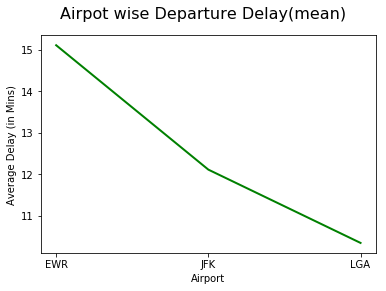

In [23]:
#departure delay airport wise 

c=df2[['dep_delay','origin']].groupby('origin').mean()

print("Origin:  ", c.index)
print("Max Average Delay", c.max())
print("Airport with Max Average Delay", c.idxmax())
print("Min Average Delay", c.min())
print("Airport with Min Average Delay", c.idxmin())

plt.plot(c, linewidth=2.0,color='green')
plt.xlabel('Airport')
plt.ylabel('Average Delay (in Mins)')
plt.suptitle('Airpot wise Departure Delay(mean)',fontsize=16)

plt.show()

# Best airports in terms of time departure

In [24]:
#create dataframe with airports and dep_delay
departure_df = flight_data.loc[flight_data['dep_delay'].notnull(),['origin','dep_delay']]
departure_df['dep_delay']=departure_df['dep_delay'].astype(int)
departure_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 328521 entries, 0 to 336769
Data columns (total 2 columns):
origin       328521 non-null object
dep_delay    328521 non-null int32
dtypes: int32(1), object(1)
memory usage: 6.3+ MB


In [25]:
#filter rows where  dep_delay=0 (on time departures)
ontime_departure_df = departure_df.loc[departure_df['dep_delay'].eq(0),['origin','dep_delay']]
ontime_departure_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16514 entries, 15 to 336753
Data columns (total 2 columns):
origin       16514 non-null object
dep_delay    16514 non-null int32
dtypes: int32(1), object(1)
memory usage: 322.5+ KB


In [26]:
airports = departure_df.origin.unique()
print("Departure Airpots: " , airports)

Departure Airpots:  ['EWR' 'LGA' 'JFK']


In [27]:
departure_count = departure_df['origin'].value_counts()
departure_count.head()

EWR    117596
JFK    109416
LGA    101509
Name: origin, dtype: int64

In [28]:
ontime_departure_count = ontime_departure_df['origin'].value_counts()
ontime_departure_count.head()

JFK    6239
EWR    5585
LGA    4690
Name: origin, dtype: int64

In [29]:
#Create datafram for further calculation 
mydf = pd.DataFrame(data=ontime_departure_count)
mydf.info()
mydf2 = pd.DataFrame(data=departure_count )
mydf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, JFK to LGA
Data columns (total 1 columns):
origin    3 non-null int64
dtypes: int64(1)
memory usage: 48.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, EWR to LGA
Data columns (total 1 columns):
origin    3 non-null int64
dtypes: int64(1)
memory usage: 48.0+ bytes


In [30]:
#rename columns for clarity
mydf = mydf.rename(index=str, columns={"origin": "ontime_flights"})
mydf2 = mydf2.rename(index=str, columns={"origin": "total_flights"})

In [31]:
#join dfs for final result
ontime_dep_result = pd.concat([mydf, mydf2], axis=1)
ontime_dep_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, EWR to LGA
Data columns (total 2 columns):
ontime_flights    3 non-null int64
total_flights     3 non-null int64
dtypes: int64(2)
memory usage: 72.0+ bytes


In [32]:

ontime_dep_result.head()

,ontime_flights,total_flights
EWR,5585,117596
JFK,6239,109416
LGA,4690,101509


In [33]:
#calculate % ontime departure
ontime_dep_result = ontime_dep_result.assign(ontime_per = 
                                            lambda x: ((x.ontime_flights*100)/x.total_flights))

In [34]:
print (ontime_dep_result.head())
#Airpot with best ontime %
print(ontime_dep_result['ontime_per'].max())
print (ontime_dep_result['ontime_per'].idxmax())

     ontime_flights  total_flights  ontime_per
EWR            5585         117596    4.749311
JFK            6239         109416    5.702091
LGA            4690         101509    4.620280
5.702091101849821
JFK


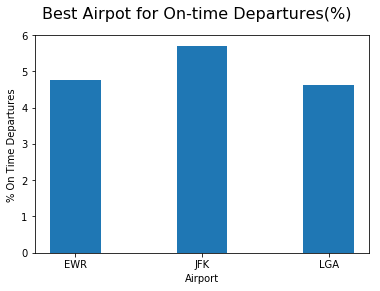

In [39]:
plt.bar(ontime_dep_result.index.tolist(),ontime_dep_result['ontime_per'] , width=0.4, bottom=None)
plt.xlabel('Airport')
plt.ylabel('% On Time Departures')
plt.suptitle('Best Airpot for On-time Departures(%)',fontsize=16)
plt.show()

# Most Busy Airport

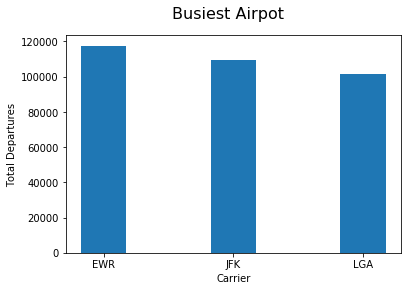

In [41]:
plt.bar(mydf2.index.tolist(),mydf2['total_flights'] , width=0.35, bottom=None)
plt.xlabel('Carrier')
plt.ylabel('Total Departures')
plt.suptitle('Busiest Airpot',fontsize=16)

plt.show()

# 3. Aircraft speed analysis

In [42]:
#aircraft speed
air_speed_df = flight_data.loc[flight_data['air_time'].notnull(),['tailnum','air_time','distance']]
air_speed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 3 columns):
tailnum     327346 non-null object
air_time    327346 non-null float64
distance    327346 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ MB


In [43]:


air_speed_df.sample(7)



,tailnum,air_time,distance
85216,N3GDAA,208.0,1389
242259,N371CA,91.0,655
228538,N11119,152.0,1092
105927,N273JB,144.0,937
20641,N819UA,130.0,719
296390,N39475,194.0,1400
17955,N828MQ,54.0,213


In [46]:
#calculate and add speed (miles/hr)
air_speed_df = air_speed_df.assign(avg_Speed = lambda x: ((x.distance*60)/x.air_time))

In [47]:
mean_air_speed = air_speed_df.groupby('tailnum')['avg_Speed'].mean()
mean_air_speed.head()

tailnum
D942DN    381.463714
N0EGMQ    390.577378
N10156    385.115125
N102UW    393.785127
N103US    387.943443
Name: avg_Speed, dtype: float64

In [48]:
#aircraft with Highest speed
print ("Aircraft with Highest Speed: ",mean_air_speed.idxmax(), "Speed (miles/hour): ",mean_air_speed.max())
print ("Total Number of Aircrafts Compared: ", mean_air_speed.size)

Aircraft with Highest Speed:  N228UA Speed (miles/hour):  500.81632653061223
Total Number of Aircrafts Compared:  4037


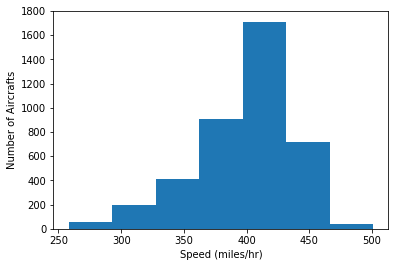

In [52]:
#histogram of speed
plt.hist(mean_air_speed, bins=7)
plt.xlabel('Speed (miles/hr)')
plt.ylabel('Number of Aircrafts')
plt.show()

In [53]:
#Carrier owning fastest aircraft
fastest_carrier = flight_data.loc[flight_data['tailnum']==("N228UA"),['carrier','tailnum','flight']]

In [54]:
fastest_carrier

,carrier,tailnum,flight
301176,UA,N228UA,755


# 4. On time arrival % analysis.

In [55]:
#ontime arrival flight wise
arrival_df = flight_data.loc[flight_data['arr_delay'].notnull(),['flight','arr_delay','carrier']]
arrival_df.info()
ontime_arrival_df = flight_data.loc[flight_data['arr_delay'].eq(0),['flight','arr_delay','carrier']]
ontime_arrival_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 3 columns):
flight       327346 non-null int64
arr_delay    327346 non-null float64
carrier      327346 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5409 entries, 35 to 336595
Data columns (total 3 columns):
flight       5409 non-null int64
arr_delay    5409 non-null float64
carrier      5409 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 169.0+ KB


In [59]:
flights = arrival_df.flight.unique()
print("total flights: " , flights.size)

#each flight occurance 
flights_count = arrival_df['flight'].value_counts()
flights_count.head()

total flights:  3835


15     956
27     886
181    875
301    852
161    780
Name: flight, dtype: int64

In [57]:
ontime_flights_count = ontime_arrival_df['flight'].value_counts()
ontime_flights_count.head()

15     22
575    19
269    18
3      16
219    16
Name: flight, dtype: int64

In [60]:
mydf = pd.DataFrame(data=ontime_flights_count)
mydf2 = pd.DataFrame(data=flights_count)

In [61]:
#change column name for clarity
mydf.rename(columns={'flight': 'ontime_flights'}, inplace=True)
mydf2.rename(columns={'flight': 'total_flights'}, inplace=True)

In [62]:
#join dfs for final result
ontime_result = pd.concat([mydf, mydf2], axis=1)
ontime_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3835 entries, 1 to 8500
Data columns (total 2 columns):
ontime_flights    1838 non-null float64
total_flights     3835 non-null int64
dtypes: float64(1), int64(1)
memory usage: 89.9 KB


In [63]:
#set ontime to 0 for NaNs (missing dep_delay)
idx = pd.IndexSlice	
ontime_result.update(ontime_result.loc[idx[:],idx['ontime_flights']].fillna(value=0))

In [64]:
ontime_result.tail()

,ontime_flights,total_flights
6168,0.0,2
6177,5.0,160
6180,0.0,6
6181,1.0,80
8500,0.0,1


In [65]:
#calculate % ontime arrival 
ontime_result = ontime_result.assign(ontime_per = lambda x: ((x.ontime_flights*100)/x.total_flights))
ontime_result.tail()

,ontime_flights,total_flights,ontime_per
6168,0.0,2,0.000
6177,5.0,160,3.125
6180,0.0,6,0.000
6181,1.0,80,1.250
8500,0.0,1,0.000


# **flight with best ontime %

In [66]:
print(ontime_result['ontime_per'].max())
ontime_result['ontime_per'].idxmax()

100.0


748

In [67]:
ontime_result.total_flights.unique()

array([697,  51, 628, 391, 324, 206, 236, 234, 152,  61, 535, 127, 956,
        95, 326,   8, 438, 224, 567, 174, 538, 167,  94, 886,   5, 435,
       166, 317, 104, 338, 154, 286, 156,  10,  41,  81,  60, 155, 113,
       133, 169, 125,   2,   6,  58, 384,  20, 151, 131, 478, 259, 351,
        14, 287, 124,   4, 279, 139, 189,   9,  55, 161,  43,  15, 631,
       117, 475, 492,   1, 184, 408, 336,   3, 105,  16, 109, 280,  17,
        67, 270, 190, 195, 528, 194, 527, 316,  36, 477, 168,  38, 534,
        31, 393, 153, 119, 377,  30, 170, 497,  76,  34,  68,  40, 311,
        13,  54, 780,  11, 298, 532, 180,  42, 254, 130, 135, 328, 524,
       875, 607,  29, 487, 122, 271, 186, 142,  99, 204, 432, 126,  19,
        53,  25, 345, 261, 147, 192,  22,  45, 182, 212,  12,  35, 245,
       253,  93,  18,   7,  27,  28,  86, 285,  73,  92,  50, 429,  89,
        84,  48, 141, 158, 525, 112,  26, 218,  49,  39, 587, 229,  52,
       101,  65,  21,  79,  23, 143,  71, 290, 852, 680, 545, 23

# find top 10 Flights with best % ontime arrival

In [69]:
#Ignore the flights with less than 5 total flights ( not significant )
best_ontime_arrival = ontime_result.loc[ontime_result['total_flights'] >= 5]
best_ontime_arrival.head(10)

,ontime_flights,total_flights,ontime_per
1,10.0,697,1.434720
2,2.0,51,3.921569
3,16.0,628,2.547771
4,8.0,391,2.046036
5,2.0,324,0.617284
6,1.0,206,0.485437
7,3.0,236,1.271186
8,4.0,234,1.709402
9,3.0,152,1.973684
10,1.0,61,1.639344


In [70]:
#flight with Maximum number of ontime flights

print("Flight with Maximum # of ontime flights")
print ( best_ontime_arrival.loc[best_ontime_arrival['ontime_flights'].idxmax()])

Flight with Maximum # of ontime flights
ontime_flights     22.000000
total_flights     956.000000
ontime_per          2.301255
Name: 15, dtype: float64


In [71]:
top10 = best_ontime_arrival.sort_values(by=['ontime_per','total_flights'],ascending=False).head(10)
top10

,ontime_flights,total_flights,ontime_per
2153,2.0,7,28.571429
4627,2.0,9,22.222222
4306,3.0,15,20.000000
68,1.0,5,20.000000
1449,1.0,5,20.000000
2339,1.0,5,20.000000
2381,1.0,5,20.000000
3639,1.0,5,20.000000
4616,1.0,5,20.000000
5035,1.0,5,20.000000


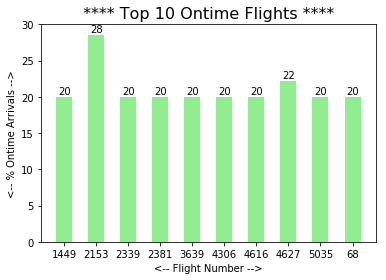

In [74]:
#plot top 10
fig, ax = plt.subplots()
rects1 = ax.bar(top10.index.astype(str).tolist(),top10['ontime_per'], 0.5, color='lightgreen')

# add some text for labels, title 
ax.set_ylabel('<-- % Ontime Arrivals -->')
ax.set_xlabel('<-- Flight Number -->')
ax.set_title(' **** Top 10 Ontime Flights **** ',fontsize=16)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height, '%d' % int(height), ha='center', va='bottom')

autolabel(rects1)
plt.show()

# 5. Maximum number of flights headed to some particular destination

In [81]:
dest_fligh_count = flight_data['dest'].value_counts()

dest_fligh_count.head()

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

In [80]:
dest_fligh_count

336776

In [82]:
print("Destination with Maximum flights: ",dest_fligh_count.idxmax(),"Total Flights to this Dest: ", dest_fligh_count.max())

Destination with Maximum flights:  ORD Total Flights to this Dest:  17283


In [83]:
top5 = dest_fligh_count.sort_values(ascending=False).iloc[:5]
top5

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

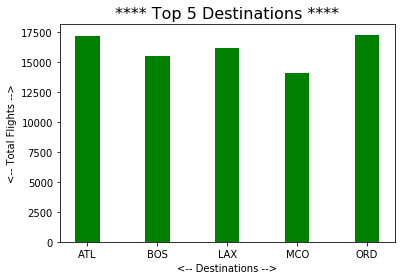

In [86]:
fig, ax = plt.subplots()
rects1 = ax.bar(top5.index,top5.values, 0.35, color='green')

# add some text for labels, title 
ax.set_ylabel('<-- Total Flights -->')
ax.set_xlabel('<-- Destinations -->')
ax.set_title(' **** Top 5 Destinations **** ',fontsize=16)


plt.show()

# ----END----